In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdallahalidev/plantvillage-dataset")

print("Path to dataset files:", path)

100%|██████████| 2.04G/2.04G [00:21<00:00, 99.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/abdallahalidev/plantvillage-dataset/versions/3


In [1]:
#set seed for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [21]:
 import os
 import json
 from zipfile import ZipFile
 from PIL import Image

 import numpy as np
 import matplotlib.pyplot as plt
import matplotlib.image as mpimg

 from tensorflow.keras.preprocessing.image import ImageDataGenerator
 from tensorflow.keras import layers, models



In [4]:
kaggle_credentials=json.load(open("kaggle.json"))

In [5]:
#setup kaggle API key as environment variables
os.environ['KAGGLE_USERNAME']=kaggle_credentials['username']
os.environ['KAGGLE_KEY']=kaggle_credentials['key']

In [6]:
!ls

kaggle.json  sample_data


In [7]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
 99% 2.03G/2.04G [00:13<00:00, 46.6MB/s]
100% 2.04G/2.04G [00:13<00:00, 158MB/s] 


In [8]:
!ls

kaggle.json  plantvillage-dataset.zip  sample_data


In [9]:
with ZipFile('plantvillage-dataset.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [10]:
!ls

 kaggle.json  'plantvillage dataset'   plantvillage-dataset.zip   sample_data


In [15]:
print(os.listdir("plantvillage dataset"))

print(len(os.listdir("plantvillage dataset/segmented")))

print(os.listdir("plantvillage dataset/segmented") [:5])

print(len(os.listdir("plantvillage dataset/color")))

print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))

print(os.listdir("plantvillage dataset/grayscale")[:5])

['color', 'segmented', 'grayscale']
38
['Apple___Apple_scab', 'Cherry_(including_sour)___healthy', 'Tomato___Early_blight', 'Tomato___Tomato_mosaic_virus', 'Tomato___Leaf_Mold']
38
['Apple___Apple_scab', 'Cherry_(including_sour)___healthy', 'Tomato___Early_blight', 'Tomato___Tomato_mosaic_virus', 'Tomato___Leaf_Mold']
38
['Apple___Apple_scab', 'Cherry_(including_sour)___healthy', 'Tomato___Early_blight', 'Tomato___Tomato_mosaic_virus', 'Tomato___Leaf_Mold']


In [18]:
print(len(os.listdir("plantvillage dataset/color/Cherry_(including_sour)___healthy")))
print(os.listdir("plantvillage dataset/color/Cherry_(including_sour)___healthy")[:5])

854
['f94456da-a0d9-4dfc-80ed-0b2d597c5479___JR_HL 3997.JPG', 'a0f50c57-dd13-45a8-b9d3-b8f270e496f0___JR_HL 4314.JPG', '4ccaaa5f-1624-4144-b079-21f64c7bd781___JR_HL 9631.JPG', '5a0baad8-7eee-484c-9753-5156adada200___JR_HL 9677.JPG', '4b59856f-7264-4328-a7a3-0a84649f8e89___JR_HL 9642.JPG']


In [19]:
#dataset path
base_dir='plantvillage dataset/color'

(256, 256, 3)


(-0.5, 255.5, 255.5, -0.5)

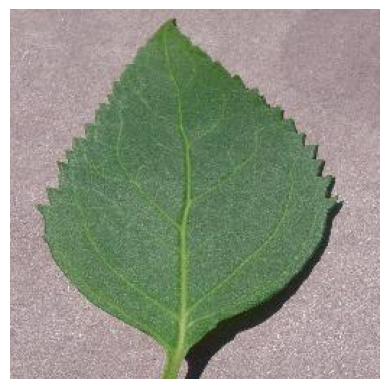

In [25]:
image_path='/content/plantvillage dataset/color/Cherry_(including_sour)___healthy/f94456da-a0d9-4dfc-80ed-0b2d597c5479___JR_HL 3997.JPG'

img=mpimg.imread(image_path)
print(img.shape)
plt.imshow(img)
plt.axis('off')

In [26]:
#Image Parameters
img_size=224
batch_size=32

In [27]:
#image data generators
data_gen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [29]:
#Train Generator
train_generator=data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [30]:
#Validation Generator
validation_generator=data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


In [31]:
#Model Definition
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(img_size,img_size,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(train_generator.num_classes,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
#model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
#compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [35]:
#training the model
history=model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 111s 77ms/step - accuracy: 0.6034 - loss: 1.6227 - val_accuracy: 0.8719 - val_loss: 0.4083
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 120s 64ms/step - accuracy: 0.9195 - loss: 0.2530 - val_accuracy: 0.8714 - val_loss: 0.4126
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 143s 65ms/step - accuracy: 0.9682 - loss: 0.1015 - val_accuracy: 0.8901 - val_loss: 0.4180
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 95s 70ms/step - accuracy: 0.9778 - loss: 0.0662 - val_accuracy: 0.8778 - val_loss: 0.5323
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 88s 65ms/step - accuracy: 0.9817 - loss: 0.0580 - val_accuracy: 0.8890 - val_loss: 0.5074


In [37]:
#model evaluation
print("Evaluating model....")
val_loss,val_accuracy=model.evaluate(validation_generator,steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy*100:.2f}%")

Evaluating model....
339/339 ━━━━━━━━━━━━━━━━━━━━ 16s 47ms/step - accuracy: 0.8868 - loss: 0.5045
Validation Accuracy: 88.90%


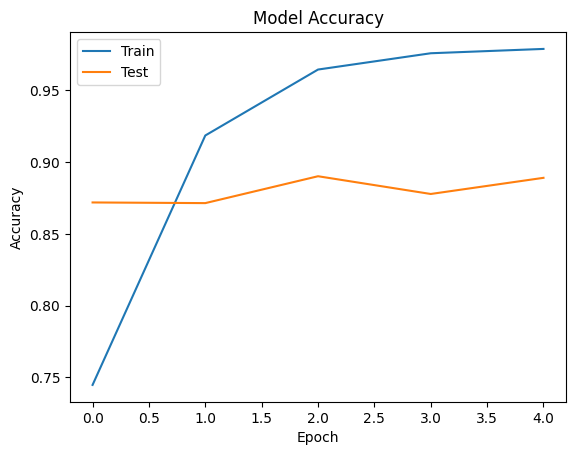

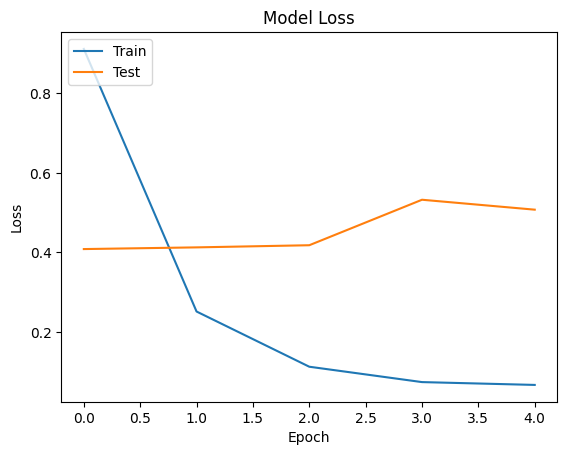

In [38]:
#plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

#plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()


In [46]:
#function to load and preprocess the image using pillow
def load_and_preprocess_image(image_path, target_size=(224,224)):
  #load the image
  img=Image.open(image_path)
  #resize the image
  img=img.resize(target_size)
  #convert the image to numpy array
  img_array=np.array(img)
  #add batch dimension
  img_array=np.expand_dims(img_array, axis=0)
  #scale the image values to [0,1]
  img_array=img_array.astype('float32') / 255
  return img_array


  #function to predict the class of an image

def predict_image_class(model,image_path,class_indices):
  preprocessed_img=load_and_preprocess_image(image_path)
  prediction=model.predict(preprocessed_img)
  predicted_class_index=np.argmax(prediction,axis=1)[0]
  predicted_class_name=class_indices[predicted_class_index]
  return predicted_class_name


In [47]:
#create a mapping from class indices to class names
class_indices={v: k for k, v in train_generator.class_indices.items()}

In [48]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [49]:
#saving the class name as json file
json.dump(class_indices, open("class_indices.json","w"))

In [50]:
predicted_class_name=predict_image_class(model,image_path,class_indices)
print(f"Predicted class: {predicted_class_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted class: Cherry_(including_sour)___healthy


In [51]:
#save the model
model.save('drive/MyDrive/plantvillage_disease_prediction_model.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')